In [60]:
import pandas as pd

In [123]:
data1 = pd.read_csv(r'C:\Users\Brahim\Desktop\prog\ger_data.csv')

## Informations sur les variables

In [124]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Stat_exist_check_acc         1000 non-null object
Duration_month               1000 non-null int64
Credit_history               1000 non-null object
Purpose                      1000 non-null object
Cred_Amoun                   1000 non-null int64
Saving_accounts_bonds        1000 non-null object
present_employ_since         1000 non-null object
install_rate_dispo_income    1000 non-null int64
status_sex                   1000 non-null object
other_debtors_guarantors     1000 non-null object
pesent_residence_since       1000 non-null int64
property                     1000 non-null object
age_in_years                 1000 non-null int64
other_installment            1000 non-null object
housing                      1000 non-null object
nbr_existing_credits         1000 non-null int64
job                          1000 non-null object
nbr_people_liable            1000 non-null int64
t

In [6]:
#Valeurs uniques
print(data1.nunique())

Stat_exist_check_acc           4
Duration_month                33
Credit_history                 5
Purpose                       10
Cred_Amoun                   921
Saving_accounts_bonds          5
present_employ_since           5
install_rate_dispo_income      4
status_sex                     4
other_debtors_guarantors       3
pesent_residence_since         4
property                       4
age_in_years                  53
other_installment              3
housing                        3
nbr_existing_credits           4
job                            4
nbr_people_liable              2
telephone                      2
forgeign_worker                2
target                         2
dtype: int64


In [8]:
for col in data1.columns:
    print(col)
    if len(data1[col].unique())<20:
        print(data1[col].unique())
    else:
        print("[Too much to handle]")

Stat_exist_check_acc
['A11' 'A12' 'A14' 'A13']
Duration_month
[Too much to handle]
Credit_history
['A34' 'A32' 'A33' 'A30' 'A31']
Purpose
['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Cred_Amoun
[Too much to handle]
Saving_accounts_bonds
['A65' 'A61' 'A63' 'A64' 'A62']
present_employ_since
['A75' 'A73' 'A74' 'A71' 'A72']
install_rate_dispo_income
[4 2 3 1]
status_sex
['A93' 'A92' 'A91' 'A94']
other_debtors_guarantors
['A101' 'A103' 'A102']
pesent_residence_since
[4 2 3 1]
property
['A121' 'A122' 'A124' 'A123']
age_in_years
[Too much to handle]
other_installment
['A143' 'A141' 'A142']
housing
['A152' 'A153' 'A151']
nbr_existing_credits
[2 1 3 4]
job
['A173' 'A172' 'A174' 'A171']
nbr_people_liable
[1 2]
telephone
['A192' 'A191']
forgeign_worker
['A201' 'A202']
target
[1 2]


## Some Data Exploration

In [126]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # Offline plotly version
import plotly.graph_objs as go 
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

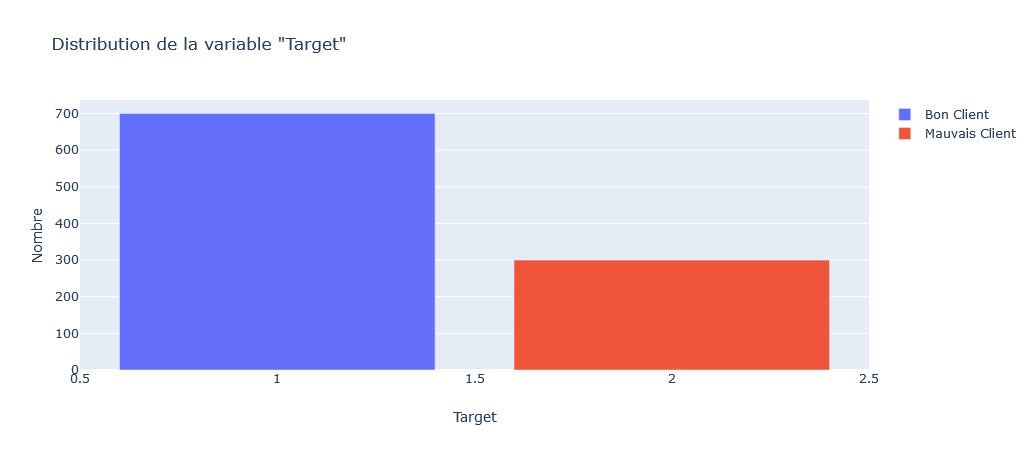

In [127]:
trace0 = go.Bar(
            x = data1[data1["target"]== 1]["target"].value_counts().index.values,
            y = data1[data1["target"]== 1]["target"].value_counts().values,
            name='Bon Client'
    )

trace1 = go.Bar(
            x = data1[data1["target"]== 2]["target"].value_counts().index.values,
            y = data1[data1["target"]== 2]["target"].value_counts().values,
            name='Mauvais Client'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Nombre'
    ),
    xaxis=dict(
        title='Target'
    ),
    title='Distribution de la variable "Target"'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

C:\Users\Brahim\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



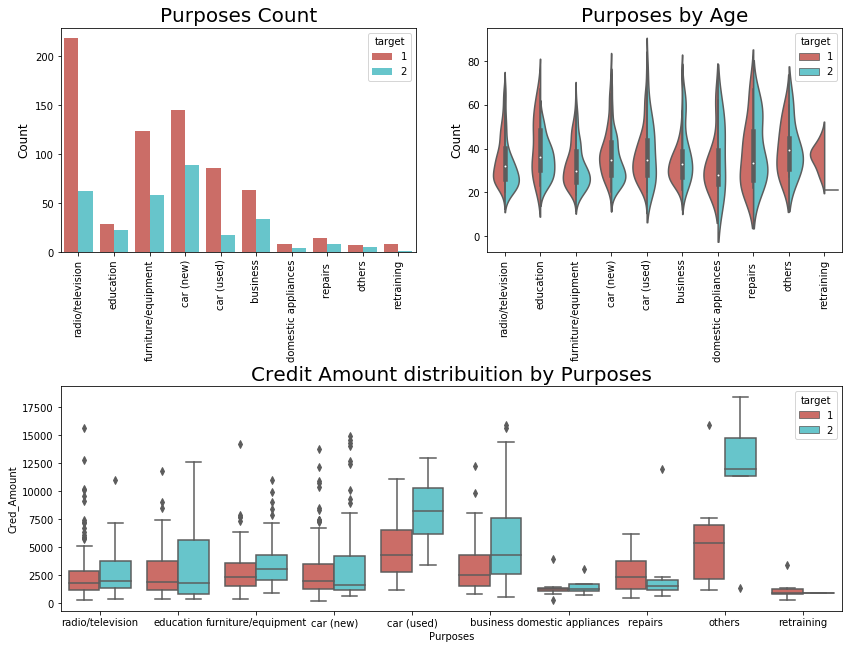

In [128]:
# Copy of data to use the names of variable for better viz
data2 = data1
data2 = data2.replace(to_replace=['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'],value=['radio/television','education','furniture/equipment','car (new)','car (used)',' business','domestic appliances','repairs ','others','retraining'])

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=data2, 
              palette="hls", hue = "target")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="age_in_years", data=data2, 
                    palette="hls", hue = "target",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Cred_Amoun", data=data2, 
               palette="hls", hue = "target")
g2.set_xlabel("Purposes", fontsize=10)
g2.set_ylabel("Cred_Amount", fontsize=10)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show();

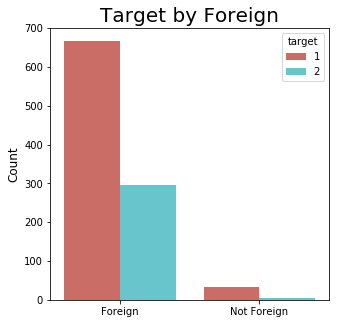

In [129]:
data2 = data1
data2 = data2.replace(to_replace=['A201', 'A202'],value=['Foreign','Not Foreign',])

plt.figure(figsize = (5,5))
plt.subplot(111)

g1 = sns.countplot(x="foreign_worker", data=data2, 
              palette="hls", hue = "target")
g1.set_xticklabels(g1.get_xticklabels())
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Target by Foreign", fontsize=20)



#plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show();

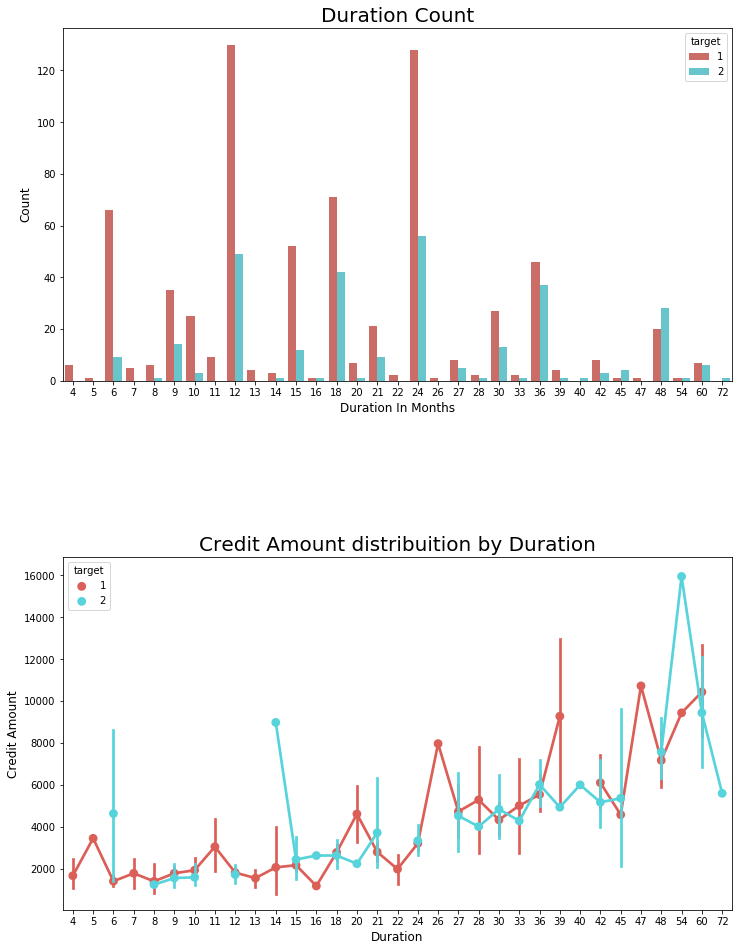

In [107]:
plt.figure(figsize = (12,14))

g= plt.subplot(211)
g = sns.countplot(x="Duration_month", data=data1, 
              palette="hls",  hue = "target")
g.set_xlabel("Duration In Months", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(212)
g1 = sns.pointplot(x="Duration_month", y ="Cred_Amoun",data=data1,
                   hue="target", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 1)

plt.show()

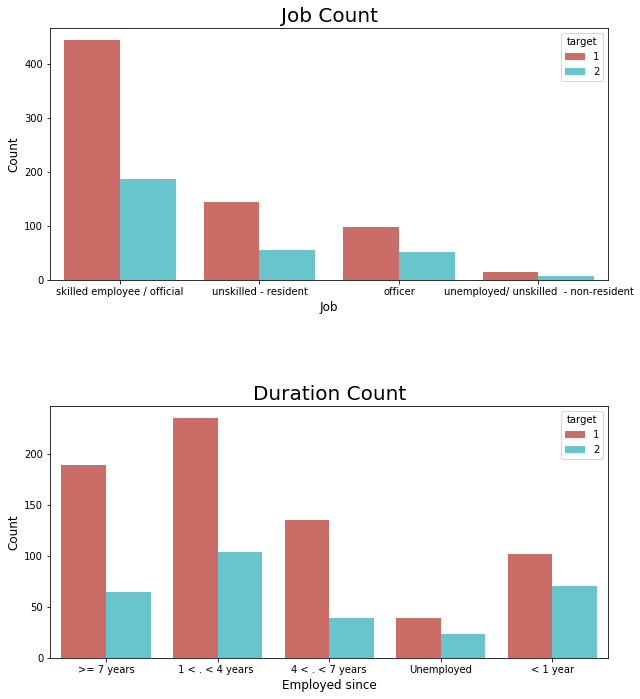

In [130]:
plt.figure(figsize = (10,10))

data2 = data1
data2 = data2.replace(to_replace=['A171', 'A172','A173','A174'],value=['unemployed/ unskilled  - non-resident','unskilled - resident','skilled employee / official','officer'])
data2 = data2.replace(to_replace=['A71', 'A72','A73','A74','A75'],value=['Unemployed','< 1 year','1 < . < 4 years ','4 < . < 7 years','>= 7 years'])

g= plt.subplot(211)
g = sns.countplot(x="job", data=data2, 
              palette="hls",  hue = "target")
g.set_xlabel("Job", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Job Count", fontsize=20)

g1 = plt.subplot(212)
g1 = sns.countplot(x="present_employ_since", data=data2, 
              palette="hls",  hue = "target")
g1.set_xlabel("Employed since", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Duration Count", fontsize=20)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 1)

plt.show()